In [1]:
from pylab import *
import numpy as np
import os
from scipy import interpolate
from IPython import display
#os.chdir("../")
import models as wedge


 #### Source List Comparison
**Class II**:  TW Hya
Macc: 0.46-7.9e-9 Msun/yr (average 2.5e-9 Msun/yr ) - Herczeg 2023
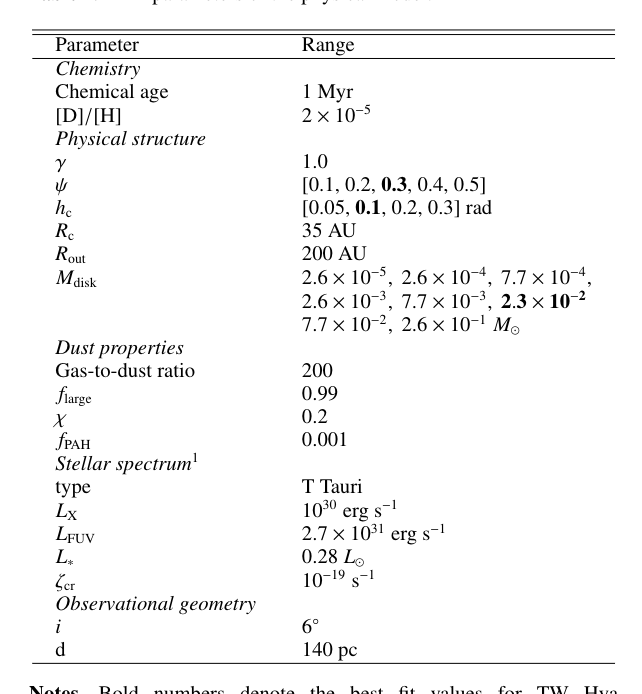
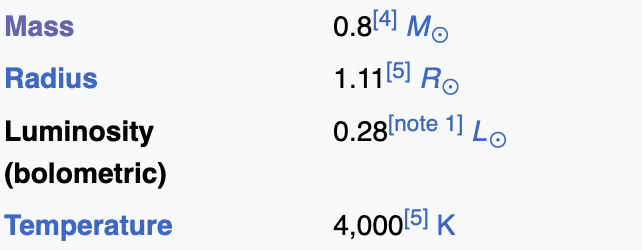

**Class 0/I**: HL Tau  
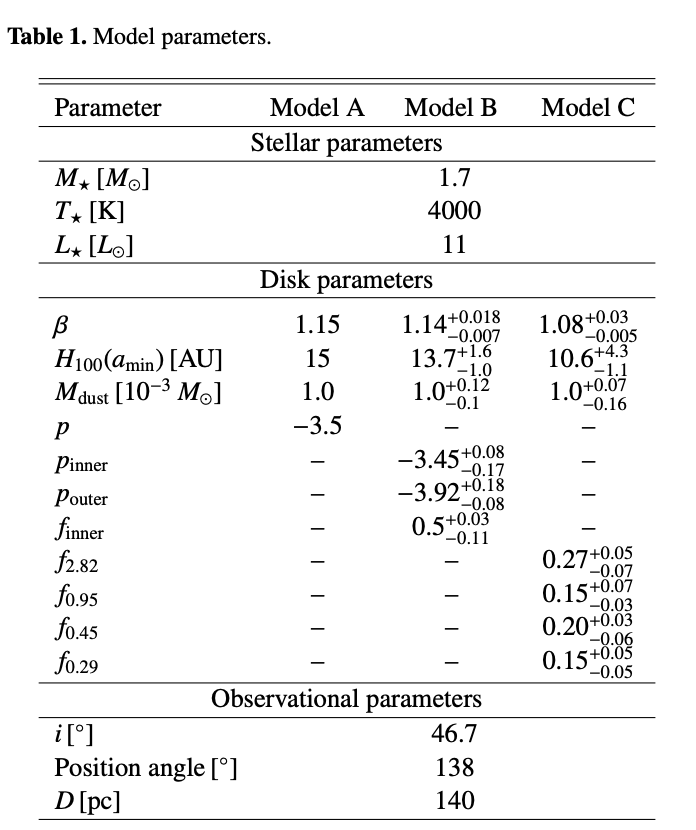
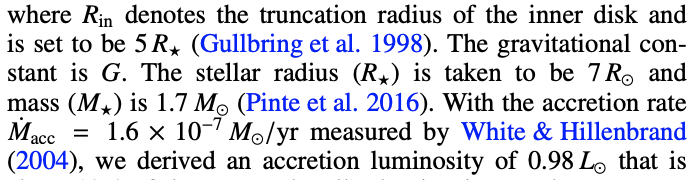

Rin-Rc: 30 - 60 au  
Min: 1e-6 or 1e-7 Msun/yr    
Mdust: 1-3 1e-3 Msun  
Rdust: 60 au?  
Rout: 100 au   


In [2]:
#hltau_pars = wedge.new_model(key='HL_Tau')
twhya_pars = wedge.new_model(key='TW_Hya')
#hltau_d = wedge.new_model(key='HL_Tau')
#hltau_d['Min'] = 0.
hd163_pars = wedge.new_model(key='HD_163')
#m0 = wedge.initialize_model(hd163_pars,outdir='/out/TWH_test/')
twhya_pars = wedge.new_model(key='TW_Hya')
m1 = wedge.initialize_model(twhya_pars,outdir='/out/TWH_test/')
#m0d = wedge.initialize_model(hltau_d,outdir='/out/HD_test_no_e/')

directory exists - will overwrite current model if you write to it!
writing amr_grid.inp
Reading /Users/schwarz/Documents/GitHub/wedgeford/models/templates/wavelength_micron.inp
Writing /Users/schwarz/Documents/GitHub/wedgeford//out/TWH_test/wavelength_micron.inp
Reading /Users/schwarz/Documents/GitHub/wedgeford//out/TWH_test/wavelength_micron.inp
Assigned model directory:/Users/schwarz/Documents/GitHub/wedgeford//out/TWH_test/


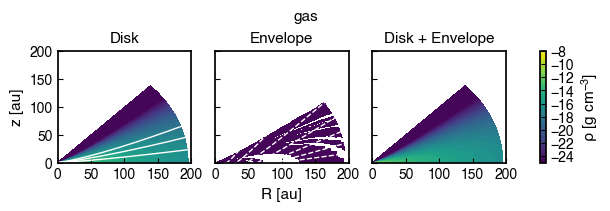

In [3]:
#wedge.plot_components(m0,fluid=0,rlim=200)
wedge.plot_components(m1,fluid=0,rlim=200)
#wedge.plot_components(m0d,fluid=0,rlim=200)


In [5]:
#If you have your own opacity files and don't wish to run optool, put their names in here, need to be in out directory for the model
filename_small_dust = 'lg_maps_std'
filename_large_dust = 'sm_maps_std'

wedge.write_opacities(m1.m,ndust=2,filenames=[filename_small_dust,filename_large_dust],update=False)

fname lg_maps_std
/Users/schwarz/Documents/GitHub/wedgeford//out/TWH_test/dustkappa_lg_maps_std.inp: user dust opacity file found in model directory
fname sm_maps_std
/Users/schwarz/Documents/GitHub/wedgeford//out/TWH_test/dustkappa_sm_maps_std.inp: user dust opacity file found in model directory
updating dustopac.inp


In [6]:
model_list = [m1]
for m in model_list:
    wedge.overwrite_model(m)
    wedge.prep_thermal_transfer(m)

stellar_params: {'Ms': 0.8, 'Rs': 1.11, 'Ts': 4000.0, 'accrate': 2.5e-09, 'f': 0.5}
disk_params: {'Mdisk': 0.023, 'Mfrac': [0.0005, 0.005], 'R0': [0.1, 0.1], 'H0': [1, 0.2], 'p': [-1, -1], 'Rdisk': [35, 35], 'Tfac': 1, 'q': 0.5, 'hydro': [None, None, None]}
envelope_params: {'Min': 0, 'Rc': 100, 'rho_amb': 1e-25, 'rho_0': 3e-22, 'theta_min': 25, 'exf': 0.25, 'Rmax': 15000.0, 'd2g': 0.01, 'shock': False, 'nstreams': 1, 'stream_frac': 1}
grid_params: {'N': [160, 90, 48], 'min': [0.1, 0.7853981633974483, 0], 'max': [200, 1.5707963267948966, 6.283185307179586], 'spacing': ['log', 'lin', 'lin']}
dust_params: {'rho_si': 3.1518, 'amin_chem': 0.06, 'amax_ism': 1.0, 'amin': [0.005, 0.005], 'amax': [1, 1000.0], 'apow': [3.5, 3.5]}
RT_params: {'cr_model': 'ssx', 'zetacr': 1.3e-17, 'G0': 1, 'viscous_heating': False, 'fLya': 0.0001, 'xray': True}
writing amr_grid.inp
Writing /Users/schwarz/Documents/GitHub/wedgeford//out/TWH_test/wavelength_micron.inp
Writing stars.inp
writing dust_density.inp
writ

In [7]:
#doing this in terminal for now instead of here
model_list = [m0]
for m in model_list:
    wedge.do_thermal_transfer(m,nt=8)

sh: radmc3d: command not found


Reading /Users/schwarz/Documents/GitHub/wedgeford//out/TWH_test/dust_density.inp
Reading /Users/schwarz/Documents/GitHub/wedgeford//out/TWH_test/gas_density.inp
Reading /Users/schwarz/Documents/GitHub/wedgeford//out/TWH_test/dust_temperature.dat


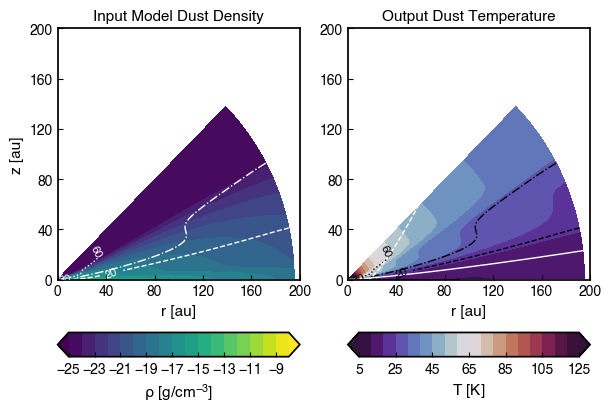

In [7]:
wedge.plot_dustRT(m1,rlim=200)


In [16]:
wedge.do_he_transfer(m0,prep=True)

fname 
Running optool to generate new opacities
Updating x-ray opacities


sh: /Users/schwarz/bin/optool: No such file or directory


FileNotFoundError: [Errno 2] No such file or directory: '/Users/schwarz/Documents/GitHub/wedgeford//out/TWH_test/dustkappa_dust-1.inp'

In [8]:
wedge.prep_line_transfer(m1,molecules={'names':['hd'],'abundances':[np.array([3.0e-5])],'lines':[2]},teq=0)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2289  100  2289    0     0  49820      0 --:--:-- --:--:-- --:--:-- 50866


writing /Users/schwarz/Documents/GitHub/wedgeford//out/TWH_test/numberdens_hd.inp
writing gas_velocity.inp
integrating uv field
no wavelength file found at path: /Users/schwarz/Documents/GitHub/wedgeford//out/TWH_test/mcmono_wavelength_micron.inp reading from template


NameError: name 'model' is not defined

### Line transfer
#### Commands for line transfer:
**spectrum**: ```radmc3d spectrum incl 0 iline 1 widthkms 30 linenlam 60 ```   
**image**: ```radmc3d image incl 0 iline 1 widthkms 30 linenlam 60 ```   

```incl```: inclination of source (best not to use zero)  
`iline`: line transition (1-0) for 1, etc.  
`widthkms`: bandpass in km/s over which spectrum is computed   
`linenlam`: number of wavelength points to take spectrum over (default 40)  

#### HD specs for TOP
~3.5" resolution at 112 microns (HD 1-0) - diffraction limited resolution  
also: (HD 2-1)  
spectral resolution: 1 km/s (average over several to get better values. 

#### Water specs for TOP
 o-H2O  
 also 18^O isotopologue  


In [477]:
from scipy import stats
from scipy.ndimage import uniform_filter1d

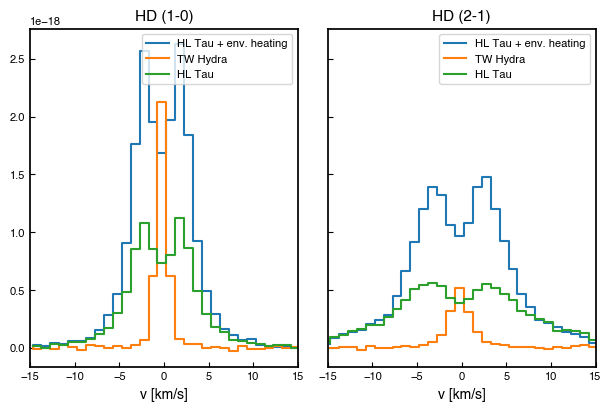

1.0494896747349294e-17 1.8673193383308964e-17
1.333802282597342e-17 1.78063752122296e-17
5.500004241075305e-18 8.957649192696263e-18
7.643784952118623e-18 9.47441644185804e-18


Text(0, 0.5, 'Surface Density [$\\mathrm{g \\ cm^{-2}}$]')

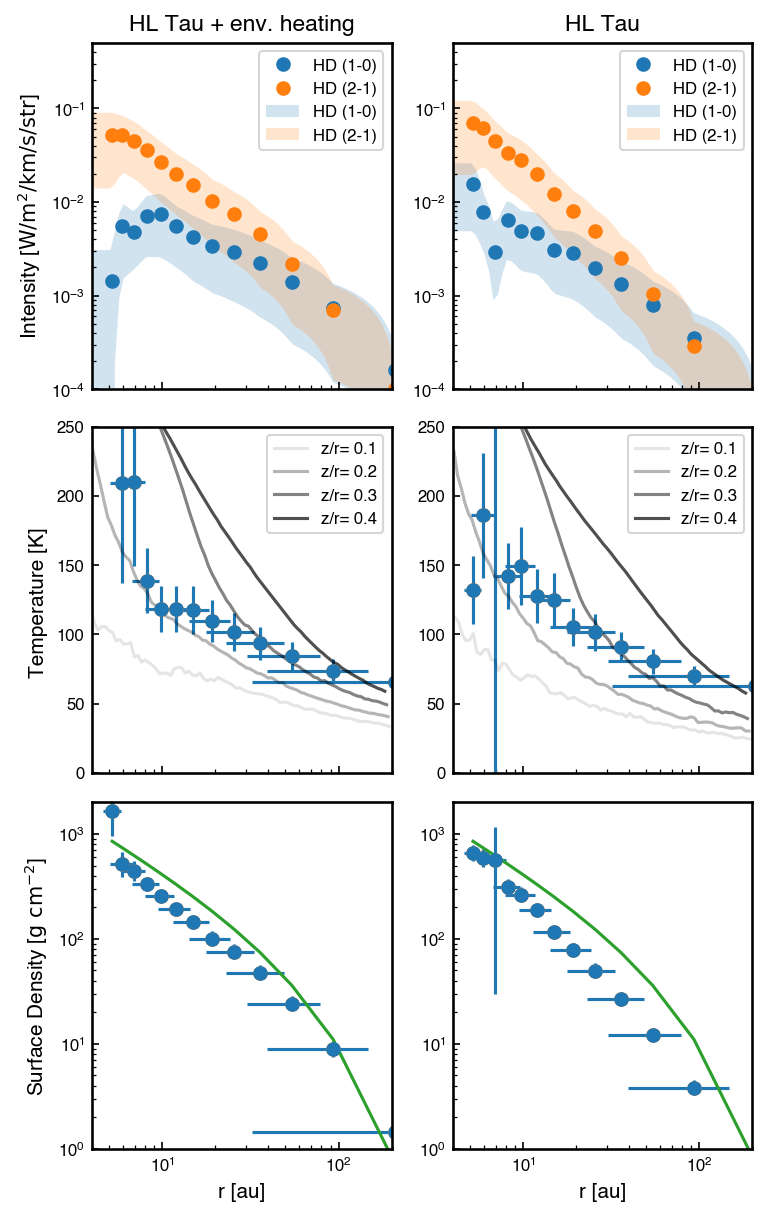

In [644]:
m0.obs_pars = {'incl':46.7, 'pa': 138, 'dpc':140}
m0d.obs_pars = {'incl':46.7, 'pa': 138, 'dpc':140}
m1.obs_pars = {'incl':6, 'pa':0, 'dpc':60}
def wav_to_kms(wav):
    wav0 = int(len(wav)/2)- 1
    wav0 = wav[wav0]
    dv = wedge.c / 1e5 * (wav-wav0) / wav0
    return dv
def flux_to_Jy(spec,dpc=140):
    return spec / (dpc**2) * 1e23

def flux_to_SI(spec, dpc=140):
    return spec / (dpc**2) / 1000

def flux_to_cgs(spec, dpc=140):
    return spec / (dpc**2)


class spectrum:
    def __init__(self,spec_in,res=1, method=flux_to_SI,model=m,J=1):
        self.wav=spec_in[:,0]
        self.spec0 = spec_in[:,1] #ergs/s/cm^2/Hz
        self.method = method
        self.model = model
        self.res = res
        self.J = J
        spec = method(self.spec0,dpc=model.obs_pars['dpc']) # chosen unit conversion energy/time/dA/spec_width
        doppv = wav_to_kms(self.wav) ## doppler shifted velocities from wavelengths
        dlam = np.gradient(self.wav*1e-4)
        dnu = dlam * wedge.c / (self.wav*1e-4)**2
        Wspec = spec*dnu #total energy in the bin
        widthv = np.amax(doppv) - np.amin(doppv) #native dv
        lenv = len(doppv) #amount of bins currently
        new_lenv = int(widthv/res)+1 #new amount of bins
        new_bins = np.arange(np.amin(doppv)-res/2, np.amax(doppv)+res/2,res) #set new bins
        if new_lenv < lenv:
            new_spec,new_v,dum = stats.binned_statistic(doppv,Wspec,bins=new_bins,statistic='sum') #sum up the bins 
            new_dnu,dum,dum = stats.binned_statistic(doppv,dnu,bins=new_bins,statistic='sum') # sum up the new size of the bins
        self.flux_Hz = new_spec/new_dnu #new flux density per Hz
        self.dv_kms = np.diff(new_v)
        self.flux_kms = new_spec/self.dv_kms #new flux density per km/s
        self.add_noise()
        self.vc_kms = 0.5*(new_v[1:]+new_v[:-1]) #new velocity centers
        self.F_int = np.sum(self.flux_kms*self.dv_kms) # total line flux
        

    def plot_spec(self,ax,**pl_kwargs):
        ax.step(self.vc_kms, self.flux_kms,**pl_kwargs)
        
    def dopp_tom(self,grid = 'centered'):
        rmax=self.model.m.grid['max'][0]
        Ms = self.model.m.star['Ms']
        def r_vi(v_vals):
            return Ms*np.sin(np.radians(self.model.obs_pars['incl']))/(v_vals/30.0)**2
        vmin = sqrt(Ms/rmax)*30.0*np.sin(np.radians(self.model.obs_pars['incl']))
        vmax = 12
        #vc_vals = np.clip(self.vc_kms, a_min = None, a_max = None)
        vc_vals = self.vc_kms
        ## assign an r at each velocity center
        vi_l = vc_vals - self.dv_kms/2.
        vi_r = vc_vals + self.dv_kms/2.
        r_l = r_vi(vi_l)
        r_r = r_vi(vi_r)
        dr_v = np.abs(r_l - r_r)
        dA_v = 0.5*pi*(r_l**2 - r_r**2) * wedge.AU**2 /1e4 #half an annulus for each dr_v
        if grid == 'centered':
            r_v = r_vi(vc_vals)
        elif grid == 'staggered':
            r_v = 0.5*(r_l+r_r)
        sigA_v = dA_v * self.dv_kms/vc_vals 
        #flux_v_annulus = self.flux_kms*Atot/dA_v*self.dv_kms
        flux_v_annulus = self.flux_kms*self.dv_kms # flux in velocity bin
        #n_bins = int((vmax-vmin)/self.res)
        #r_bins = np.unique(np.clip(uniform_filter1d(np.sort(r_v-dr_v/2.),size=3)[::2],a_min=0,a_max=rmax*2))
        r_bins = np.unique(uniform_filter1d(np.sort(r_v),size=3)[::2])
        r_good = r_v[dr_v <= r_v]
        r_v[dr_v > r_v] = r_good[-1]
        I,r_e,dum = stats.binned_statistic(r_v, flux_v_annulus, bins=r_bins,statistic='sum')
        dA_err,dum,dum = stats.binned_statistic(r_v, dA_v, bins=r_bins,statistic='std')
        dA_err2,dum,dum = stats.binned_statistic(r_v, sigA_v**2, bins=r_bins, statistic = 'sum')
        I_err,dum,dum = stats.binned_statistic(r_v,flux_v_annulus, bins=r_bins,statistic='std')
        dA_err += np.sqrt(dA_err2)
        self.r_i = 0.5*(r_e[1:]+r_e[:-1])
        self.dr_i = np.diff(r_e)
        dA_i = pi*(r_e[1:]**2 - r_e[:-1]**2)*wedge.AU**2/1e4
        dOmega_i = dA_i/(140*wedge.pc)**2
        Omega_tot = np.sum(dOmega_i)
        self.F_r = I 
        print(np.sum(self.F_r),self.F_int)
        self.I = I/(dOmega_i)
        self.I_err = self.I* np.sqrt((I_err/I)**2 + (dA_err/dA_i)**2)
        
        
    def plot_I(self,ax,**pl_kwargs):
        #ax.errorbar(self.r_i,self.I,fmt='o',xerr=self.dr_i,**pl_kwargs)
        r_lo = self.r_i - self.dr_i
        r_hi = self.r_i + self.dr_i
        I_lo = self.I - self.I_err
        I_hi = self.I + self.I_err
        r_int = np.logspace(0,2.5,100)
        ax.fill_between(r_int, np.interp(r_int, self.r_i, I_lo), np.interp(r_int, self.r_i, I_hi), alpha=0.2,**pl_kwargs)
        ax.plot(self.r_i, self.I,'o',**pl_kwargs)
        
    def Yu(self):
        F = self.I
        sigF = self.I_err
        J = self.J
        Au = [ 5.12e-8, 4.86e-07 ]
        Eu = [128.49,384.58]
        nu_ul = np.array([2674.9866600,5331.5606374])*1e9
        lam_ul_micron = 1e4 * wedge.c/(nu_ij)
        lam_ul = wedge.c/(nu_ij)
        gu = [3, 5]
        weights = Au[J-1]*nu_ul[J-1]*gu[J-1]*wedge.h
        def fy(F):
            return np.log(F*1000/weights)
        self.Yu = fy(F)
        self.Yu_err = np.sqrt((fy(F+sigF*0.5) - fy(F))**2 + (fy(F) - fy(F-sigF*0.5))**2)
        self.Eu = Eu[J-1] * np.ones_like(F)
        
    def plot_T(self,ax,**pl_kwargs):
        T2D = self.model.calc_T2D()
        R,Z = self.model.make_rz()
        for i in range(10,30,5):
            hi = np.mean(Z.T[:,-i]/R.T[:,-i])
            ax.plot(R.T[:,-i] , T2D[:,-i],color='black',alpha=(hi-0.1)/0.4,label="z/r= " + str(np.round(hi,1)))
        ax.errorbar(self.r_i,self.T_rot,fmt='o',xerr=self.dr_i,yerr=self.T_err,**pl_kwargs)
        ax.plot(self.r_i, self.T_rot,'o',**pl_kwargs)
        
        
    def plot_N(self,ax,**pl_kwargs):
        r_int= self.model.m.r
        sigma = self.model.m.sig_profile(self.r_i)
        S = self.N * 1.67e-24 * 2.3 / 3e-5
        S_hi = (self.N+self.N_err) * 1.67e-24 * 2.3 / 3e-5
        S_lo = (self.N-self.N_err) * 1.67e-24 * 2.3 / 3e-5
        ax.errorbar(self.r_i,S,fmt='o',xerr=self.dr_i,yerr=[self.N_err[0] * 1.67e-24 * 2.3 / 3e-5,self.N_err[1]*1.67e-24 * 2.3 / 3e-5],**pl_kwargs)
        ax.plot(self.r_i, S, 'o', **pl_kwargs)
        ax.plot(self.r_i, sigma, **pl_kwargs)
        
    def add_noise(self):
        J = self.J
        sigma_rms = np.array([6e-20/5.0,3.84e-20/5]) ##SI
        gen_noise = np.random.normal(loc=0, scale = sigma_rms[J-1], size=len(self.flux_kms))
        self.obs_noise = gen_noise
        self.flux_kms += gen_noise
        
        
def get_NT(s10,s21):
    def fT(Yu1,Yu2):
        return np.abs((s10.Eu-s21.Eu)/(Yu1-Yu2))
    T0 = fT(s10.Yu,s21.Yu)
    Terr_u = np.zeros_like(T0)
    Terr_l = np.zeros_like(T0)
    for err1 in [-s10.Yu_err*0.5, +s10.Yu_err*0.5]:
        for err2 in [-s21.Yu_err*0.5, +s21.Yu_err*0.5]:
            Ti = fT(s10.Yu+err1,s21.Yu+err2) - T0
            Terr_u[Ti>=0] += Ti[Ti>=0]**2
            Terr_l[Ti<0] += Ti[Ti<0]**2
    s10.T_err = (np.sqrt(Terr_u)/2.,np.sqrt(Terr_u)/2.)
    s21.T_err = s10.T_err
    def fb(Yu, T):
        return Yu - s10.Eu/T0
    b = fb(s10.Yu, T0)
    berr_u = np.zeros_like(T0)
    berr_l = np.zeros_like(T0)
    for err1 in [-s10.Yu_err*0.5,s10.Yu_err*0.5]:
        for err2 in [s10.T_err[1],-s10.T_err[0]]:
            bi = fb(s10.Yu+err1, T0+err2) - b
            berr_u[bi>=0] += bi[bi>=0]**2
            berr_l[bi<0] += bi[bi<0]**2
    b_err = (np.sqrt(berr_l)/2.,np.sqrt(berr_u)/2.)
    s10.T_rot = T0
    s21.T_rot = T0
    def Q(T):
        return wedge.kb * T /(wedge.h * 1339100e6) + (1./3.)
    def fN(T,b):
        return Q(T)*np.exp(b)
    s10.N = fN(T0,b)
    s21.N = fN(T0,b)
    Qerr_u = np.zeros_like(T0)
    Qerr_l = np.zeros_like(T0)
    for err in [s10.T_err[1],-s10.T_err[0]]:
        Qi = Q(T0+err) - Q(T0)
        Qerr_u[Qi>=0] += Qi[Qi>=0]**2
        Qerr_l[Qi<0] += Qi[Qi<0]**2
    Q_err = (np.sqrt(Qerr_u),np.sqrt(Qerr_l))
    Nerr_u = np.zeros_like(T0)
    Nerr_l = np.zeros_like(T0)
    for err1 in [s10.T_err[1],-s10.T_err[0]]:
        for err2 in [b_err[1],-b_err[0]]:
            Ni = fN(T0+err1,b+err2) - s10.N
            Nerr_u[Ni>=0] += Ni[Ni>=0]**2
            Nerr_l[Ni<0] += Ni[Ni<0]**2
    s10.N_err = (np.sqrt(Nerr_l)/2.,np.sqrt(Nerr_u)/2.)
    s21.N_err = s10.N_err
        
        

fname = 'spectrum_10.out'
spec0=np.loadtxt(m0.m.outdir+fname,skiprows=3)
spec1=np.loadtxt(m1.m.outdir+fname,skiprows=3)
spec2=np.loadtxt(m0d.m.outdir+fname,skiprows=3)

s0_10 = spectrum(spec0,model=m0,J=1)
s1_10 = spectrum(spec1,model=m1,J=1)
s2_10 = spectrum(spec2,model=m0d,J=1)

fname = 'spectrum_21.out'
spec0_=np.loadtxt(m0.m.outdir+fname,skiprows=3)
spec1_=np.loadtxt(m1.m.outdir+fname,skiprows=3)
spec2_=np.loadtxt(m0d.m.outdir+fname,skiprows=3)

s0_21 = spectrum(spec0_,model=m0,J=2)
s1_21 = spectrum(spec1_,model=m1,J=2)
s2_21 = spectrum(spec2_,model=m0d,J=2)

f,axs = subplots(1,2, dpi=100,sharey=True,sharex=True,constrained_layout=True)
ax = axs[0]
s0_10.plot_spec(ax,label='HL Tau + env. heating')
s1_10.plot_spec(ax,label='TW Hydra')
s2_10.plot_spec(ax,label='HL Tau')
ax.set_title('HD (1-0)')

ax = axs[1]
s0_21.plot_spec(ax,label='HL Tau + env. heating')
s1_21.plot_spec(ax,label='TW Hydra')
s2_21.plot_spec(ax,label='HL Tau')
ax.set_title('HD (2-1)')

for a in axs:
    a.legend()
    a.set_xlim(-15,15)
    a.set_xlabel('v [km/s]')
    
show()

f1,ax = subplots(3,2,dpi=150,sharex=True,constrained_layout=True)
f1.set_size_inches((5,8))
for s in [s0_10,s0_21,s2_10,s2_21]:
    s.dopp_tom(grid='staggered')
    s.Yu()
for s_m in [(s0_10,s0_21),(s2_10,s2_21)]:
    get_NT(*s_m)
    

ax[0,0].set_title('HL Tau + env. heating')
s0_10.plot_I(ax[0,0],label='HD (1-0)')
s0_21.plot_I(ax[0,0],label='HD (2-1)')

ax[0,1].set_title('HL Tau')
s2_10.plot_I(ax[0,1],label='HD (1-0)')
s2_21.plot_I(ax[0,1],label='HD (2-1)')


s0_10.plot_T(ax[1,0])
s2_10.plot_T(ax[1,1])

s0_10.plot_N(ax[2,0],label='HL Tau + env. heating')
s2_10.plot_N(ax[2,1],label='HL Tau')
for a in ax[0,:]:
    a.set_yscale('log')
    a.set_xscale('log')
    a.set_xlim(4,200)
    a.set_ylim(1e-4,0.5)
    #a.set_xlabel('r [au]')
    a.legend()
    
for a in ax[1,:]:
    a.set_xscale('log')
    a.set_xlim(4,200)
    a.set_ylim(0,250)
    #a.set_xlabel('r [au]')
    a.legend()
    
for a in ax[2,:]:
    a.set_yscale('log')
    a.set_xscale('log')
    a.set_xlim(4,200)
    a.set_ylim(1,2e3)
    a.set_xlabel('r [au]')
    #a.legend()
    
ax[0,0].set_ylabel('Intensity [$\mathrm{W/m^2/km/s/str}$]')
ax[1,0].set_ylabel('Temperature [K] ')
ax[2,0].set_ylabel('Surface Density [$\mathrm{g \ cm^{-2}}$]')

Reading /Users/aleksandra/Desktop/wedgeford//out/HD_test//image.out
Reading /Users/aleksandra/Desktop/wedgeford//out/HD_test_disk//image.out
Reading /Users/aleksandra/Desktop/wedgeford//out/HD_test_no_e//image.out


Text(0.5, 1.0, 'HL Tau (no envelope)')

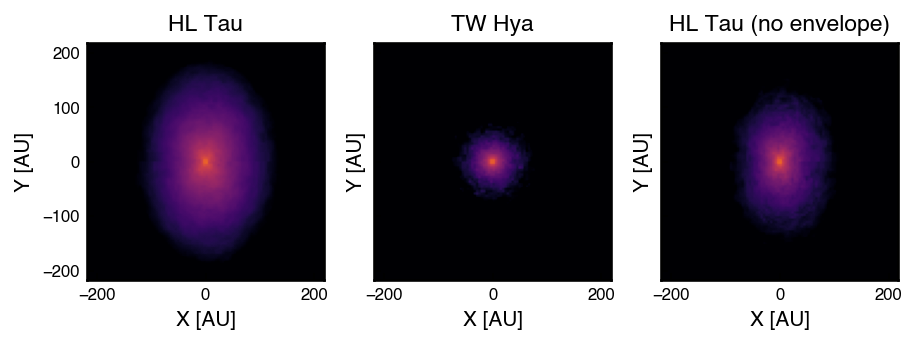

In [327]:
def moment_map(model,spec,fname='image.out', moment=0, **pl_kwargs):
    rpyim = radmc3dImage()
    im = rpyim.readImage(fname=model.m.outdir+'/'+fname)
    wav=spec[:,0]
    spec = spec[:,1]
    wav0 = int(len(wav)/2)- 1
    wav0 = wav[wav0]
    rpyim.plotMomentMap(moment=moment, wav0=wav0, dpc=model.obs_pars['dpc'], au=True,cmap='inferno',**pl_kwargs)



f, ax = subplots(1,3,dpi=150,sharex=True,sharey=True,constrained_layout=True)
sca(ax[0])
moment_map(m0,spec0,fname='image.out',moment=0,norm=matplotlib.colors.LogNorm(vmin=0.1*4*pi*6e-17,vmax=4*pi*2e-14))
title('HL Tau')
sca(ax[1])
moment_map(m1,spec1,fname='image.out',moment=0,norm=matplotlib.colors.LogNorm(vmin=0.1*4*pi*6e-17,vmax=4*pi*2e-14))
title('TW Hya')
sca(ax[2])
moment_map(m0d,spec2,fname='image.out',moment=0,norm=matplotlib.colors.LogNorm(vmin=0.1*4*pi*6e-17,vmax=4*pi*2e-14))
title('HL Tau (no envelope)')


Reading /Users/aleksandra/Desktop/wedgeford//out/HD_test_no_e//image.out
29


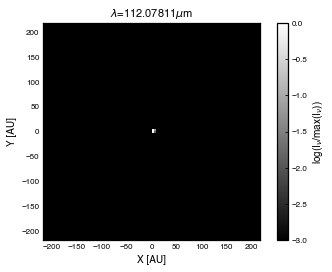

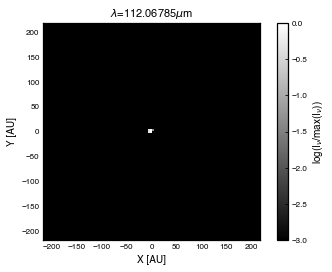

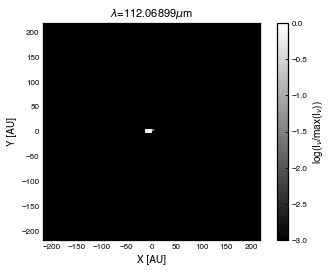

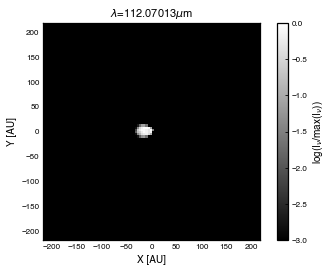

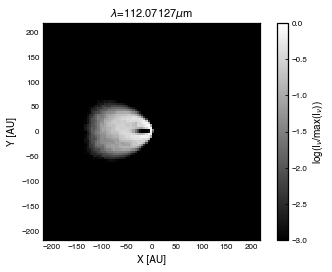

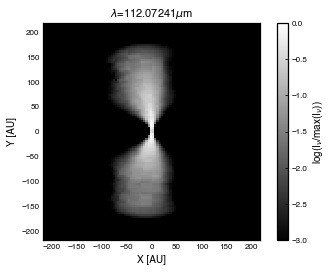

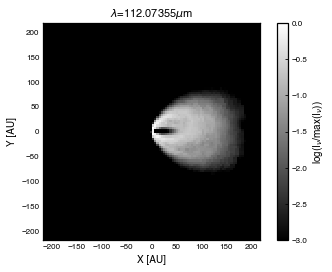

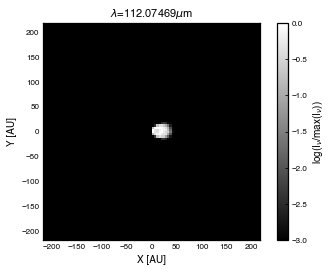

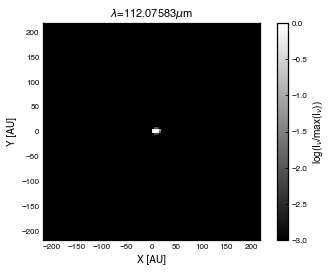

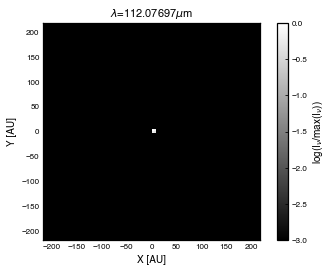

In [190]:
def channel_map(model,spec,fname='image.out', **pl_kwargs):
    rpyim = radmc3dImage()
    im = rpyim.readImage(fname=model.m.outdir+'/'+fname)
    wav=spec[:,0]
    wav0 = int(len(wav)/2)- 1
    print(wav0)
    doppv = wav_to_kms(wav)
    num_freq = len(wav)
    n = 5
    #f1,ax=subplots(1,n*2,constrained_layout=True)
    for i in np.arange(-n,n,1):
        plotImage(image=rpyim, arcsec=False, au=True, log=True, dpc=model.obs_pars['dpc'], maxlog=3, saturate=None, bunit='norm',
              ifreq=wav0+int(i*num_freq/2/n), cmap=plt.cm.gist_gray, **pl_kwargs)
        

channel_map(m0d,spec0)

## Cannabalized radmcpy image functions

In [161]:
"""This module contains classes/functions to create and read images with RADMC-3D and to calculate
interferometric visibilities and write fits files
For help on the syntax or functionality of each function see the help of the individual functions
"""
from __future__ import absolute_import
from __future__ import print_function
import traceback
import copy
import subprocess as sp
import os

try:
    import numpy as np
except ImportError:
    np = None
    print(' Numpy cannot be imported ')
    print(' To use the python module of RADMC-3D you need to install Numpy')
    print(traceback.format_exc())

try:
    import scipy.special as spc
except ImportError:
    spc = None
    print('scipy.special cannot be imported ')
    print('This module is required to be able to calculate Airy-PSFs. Now PSF calculation is limited to Gaussian.')
    print(traceback.format_exc())

try:
    from astropy.io import fits as pf
except ImportError:
    print('astropy.io.fits cannot be imported trying pyfits')
    try:
        import pyfits as pf
    except ImportError:
        pf = None
        print('pyfits cannot be imported. Either of these modules is needed to write RADMC-3D images '
              + 'to FITS format. The rest of radmc3dPy can be used but fits output is now disabled.')
        print(traceback.format_exc())

try:
    import matplotlib.pylab as plt
except ImportError:
    plt = None
    print('Warning')
    print('matplotlib.pyplot cannot be imported')
    print('Without matplotlib you can use the python module to set up a model but you will not be able to plot things')
    print('or display images')


class radmc3dImage:
    """
    RADMC-3D image class

    Attributes
    ----------

    image       : ndarray
                  The image as calculated by radmc3d (the values are intensities in erg/s/cm^2/Hz/ster)

    imageJyppix : ndarray
                  The image with pixel units of Jy/pixel

    x           : ndarray
                  x coordinate of the image [cm]

    y           : ndarray
                  y coordinate of the image [cm]

    nx          : int
                  Number of pixels in the horizontal direction

    ny          : int   
                  Number of pixels in the vertical direction

    sizepix_x   : float
                  Pixel size in the horizontal direction [cm]

    sizepix_y   : float
                  Pixel size in the vertical direction [cm]

    nfreq       : int
                  Number of frequencies in the image cube

    freq        : ndarray
                  Frequency grid in the image cube

    nwav        : int
                  Number of wavelengths in the image cube (same as nfreq)

    wav         : ndarray
                  Wavelength grid in the image cube

    """

    def __init__(self):
        self.image = None
        self.imageJyppix = None
        self.x = None
        self.y = None
        self.nx = 0
        self.ny = 0
        self.sizepix_x = 0
        self.sizepix_y = 0
        self.nfreq = 0
        self.freq = None
        self.nwav = 0
        self.wav = None
        self.stokes = False
        self.psf = {}
        self.fwhm = []
        self.pa = 0
        self.dpc = 0
        self.filename = 'image.out'

    def getClosurePhase(self, bl=None, pa=None, dpc=None):
        """Calculates clusure phases for a given model image for any arbitrary baseline triplet.

        Parameters
        ----------

        bl  : list/ndarray
              A list or ndrray containing the length of projected baselines in meter.

        pa  : list/ndarray
              A list or Numpy array containing the position angles of projected baselines in degree.

        dpc : distance of the source in parsec


        Returns
        -------
        Returns a dictionary with the following keys:

            * bl     : projected baseline in meter
            * pa     : position angle of the projected baseline in degree
            * nbl    : number of baselines
            * u      : spatial frequency along the x axis of the image
            * v      : spatial frequency along the v axis of the image
            * vis    : complex visibility at points (u,v)
            * amp    : correlation amplitude 
            * phase  : Fourier phase
            * cp     : closure phase
            * wav    : wavelength 
            * nwav   : number of wavelengths

        Notes
        -----

        bl and pa should either be an array with dimension [N,3] or if they are lists each element of
        the list should be a list of length 3, since closure phases are calculated only for closed triangles
        """

        ntri = len(bl)
        res = {'bl': np.array(bl, dtype=np.float64),
               'pa': np.array(pa, dtype=np.float64),
               'ntri': ntri,
               'nbl': 3,
               'nwav': self.nwav,
               'wav': self.wav,
               'u': np.zeros([ntri, 3, self.nwav], dtype=np.float64),
               'v': np.zeros([ntri, 3, self.nwav], dtype=np.float64),
               'vis': np.zeros([ntri, 3, self.nwav], dtype=np.complex64),
               'amp': np.zeros([ntri, 3, self.nwav], dtype=np.float64),
               'phase': np.zeros([ntri, 3, self.nwav], dtype=np.float64),
               'cp': np.zeros([ntri, self.nwav], dtype=np.float64)}


        for itri in range(ntri):
            print('Calculating baseline triangle # : ', itri)

            dum = self.getVisibility(bl=res['bl'][itri, :], pa=res['pa'][itri, :], dpc=dpc)
            res['u'][itri, :, :] = dum['u']
            res['v'][itri, :, :] = dum['v']
            res['vis'][itri, :, :] = dum['vis']
            res['amp'][itri, :, :] = dum['amp']
            res['phase'][itri, :, :] = dum['phase']
            res['cp'][itri, :] = (dum['phase'].sum(0) / np.pi * 180.) % 360.
            ii = res['cp'][itri, :] > 180.
            if (res['cp'][itri, ii]).shape[0] > 0:
                res['cp'][itri, ii] = res['cp'][itri, ii] - 360.

        return res

    # --------------------------------------------------------------------------------------------------
    def getVisibility(self, bl=None, pa=None, dpc=None):
        """Calculates visibilities for a given set of projected baselines and position angles
        with Discrete Fourier Transform.

        Parameters
        ----------

        bl  : list/ndarray
              A list or ndrray containing the length of projected baselines in meter.

        pa  : list/ndarray
              A list or Numpy array containing the position angles of projected baselines in degree.

        dpc : distance of the source in parsec

        Returns
        -------
        Returns a dictionary with the following keys:

            * bl     : projected baseline in meter
            * pa     : position angle of the projected baseline in degree
            * nbl    : number of baselines
            * u      : spatial frequency along the x axis of the image
            * v      : spatial frequency along the v axis of the image
            * vis    : complex visibility at points (u,v)
            * amp    : correlation amplitude 
            * phase  : Fourier phase
            * wav    : wavelength 
            * nwav   : number of wavelengths
        """

        nbl = len(bl)
        res = {'bl': np.array(bl, dtype=np.float64),
               'pa': np.array(pa, dtype=np.float64),
               'nbl': nbl,
               'nwav': self.nwav,
               'wav': self.wav,
               'u': np.zeros([nbl, self.nwav], dtype=np.float64),
               'v': np.zeros([nbl, self.nwav], dtype=np.float64),
               'vis': np.zeros([nbl, self.nwav], dtype=np.complex64),
               'amp': np.zeros([nbl, self.nwav], dtype=np.float64),
               'phase': np.zeros([nbl, self.nwav], dtype=np.float64)}

        

        l = self.x / wedge.AU / dpc / 3600. / 180. * np.pi
        m = self.y / wedge.AU / dpc / 3600. / 180. * np.pi
        dl = l[1] - l[0]
        dm = m[1] - m[0]

        for iwav in range(res['nwav']):

            # Calculate spatial frequencies
            res['u'][:, iwav] = res['bl'] * np.cos(res['pa']) * 1e6 / self.wav[iwav]
            res['v'][:, iwav] = res['bl'] * np.sin(res['pa']) * 1e6 / self.wav[iwav]

            for ibl in range(res['nbl']):
                dum = complex(0.)
                imu = complex(0., 1.)

                for il in range(len(l)):
                    phase = 2. * np.pi * (res['u'][ibl, iwav] * l[il] + res['v'][ibl, iwav] * m)
                    cterm = np.cos(phase)
                    sterm = -np.sin(phase)
                    dum = dum + (self.image[il, :, iwav] * (cterm + imu * sterm)).sum() * dl * dm

                res['vis'][ibl, iwav] = dum
                res['amp'][ibl, iwav] = np.sqrt(abs(dum * np.conj(dum)))
                res['phase'][ibl, iwav] = np.arccos(np.real(dum) / res['amp'][ibl, iwav])
                if np.imag(dum) < 0.:
                    res['phase'][ibl, iwav] = 2. * np.pi - res['phase'][ibl, iwav]

                print('Calculating baseline # : ', ibl, ' wavelength # : ', iwav)

        return res

    # --------------------------------------------------------------------------------------------------
    def writeFits(self, fname='', dpc=1., coord='03h10m05s -10d05m30s', bandwidthmhz=2000.0,
                  casa=False, nu0=0., stokes='I', fitsheadkeys=[], ifreq=None):
        """Writes out a RADMC-3D image data in fits format. 

        Parameters
        ----------

        fname        : str
                        File name of the radmc3d output image (if omitted 'image.fits' is used)

        dpc          : float
                        Distance of the source in pc
                        
        coord        : str
                        Image center coordinates

        bandwidthmhz : float
                        Bandwidth of the image in MHz (equivalent of the CDELT keyword in the fits header)

        casa         : bool 
                        If set to True a CASA compatible four dimensional image cube will be written

        nu0          : float
                        Rest frequency of the line (for channel maps)

        stokes       : {'I', 'Q', 'U', 'V', 'PI'}
                       Stokes parameter to be written if the image contains Stokes IQUV (possible 
                       choices: 'I', 'Q', 'U', 'V', 'PI' -Latter being the polarized intensity)

        fitsheadkeys : dictionary
                        Dictionary containing all (extra) keywords to be added to the fits header. If 
                        the keyword is already in the fits header (e.g. CDELT1) it will be updated/changed
                        to the value in fitsheadkeys, if the keyword is not present the keyword is added to 
                        the fits header. 
                       
        ifreq        : int
                       Frequency index of the image array to write. If set only this frequency of a multi-frequency
                       array will be written to file.
        """
        # --------------------------------------------------------------------------------------------------
        istokes = 0


        if self.stokes:
            if fname == '':
                fname = 'image_stokes_' + stokes.strip().upper() + '.fits'

            if stokes.strip().upper() == 'I':
                istokes = 0
            if stokes.strip().upper() == 'Q':
                istokes = 1
            if stokes.strip().upper() == 'U':
                istokes = 2
            if stokes.strip().upper() == 'V':
                istokes = 3
        else:
            if fname == '':
                fname = 'image.fits'

        # Decode the image center cooridnates
        # Check first whether the format is OK
        dum = coord

        ra = []
        delim = ['h', 'm', 's']
        for i in delim:
            ind = dum.find(i)
            if ind <= 0:
                msg = 'coord keyword has a wrong format. The format should be coord="0h10m05s -10d05m30s"'
                raise ValueError(msg)
            ra.append(float(dum[:ind]))
            dum = dum[ind + 1:]

        dec = []
        delim = ['d', 'm', 's']
        for i in delim:
            ind = dum.find(i)
            if ind <= 0:
                msg = 'coord keyword has a wrong format. The format should be coord="0h10m05s -10d05m30s"'
                raise ValueError(msg)
            dec.append(float(dum[:ind]))
            dum = dum[ind + 1:]

        target_ra = (ra[0] + ra[1] / 60. + ra[2] / 3600.) * 15.
        if dec[0] >= 0:
            target_dec = (dec[0] + dec[1] / 60. + dec[2] / 3600.)
        else:
            target_dec = (dec[0] - dec[1] / 60. - dec[2] / 3600.)

        if len(self.fwhm) == 0:
            # Conversion from erg/s/cm/cm/ster to Jy/pixel
            conv = self.sizepix_x * self.sizepix_y / (dpc * nc.pc)**2. * 1e23
        else:
            # If the image has already been convolved with a gaussian psf then self.image has
            # already the unit of erg/s/cm/cm/beam, so we need to multiply it by 10^23 to get
            # to Jy/beam
            conv = 1e23

        # Create the data to be written
        if casa:
            # Put the stokes axis to the 4th dimension
            # data = np.zeros([1, self.nfreq, self.ny, self.nx], dtype=float)
            data = np.zeros([1, self.nfreq, self.ny, self.nx], dtype=float)
            if self.nfreq == 1:
                data[0, 0, :, :] = self.image[:, :] * conv

            else:
                for inu in range(self.nfreq):
                    data[inu, 0, :, :] = self.image[:, :, inu] * conv
        else:
            data = np.zeros([self.nfreq, self.ny, self.nx], dtype=float)
            if self.stokes:
                if stokes.strip().upper() != 'PI':
                    if self.nfreq == 1:
                        data[0, :, :] = self.image[:, :, istokes, 0] * conv

                    else:
                        for inu in range(self.nfreq):
                            data[inu, :, :] = self.image[:, :, istokes, inu] * conv
                else:
                    if self.nfreq == 1:
                        data[0, :, :] = np.sqrt(self.image[:, :, 1, 0]**2 + self.image[:, :, 2, 0]**2) * conv

                    else:
                        for inu in range(self.nfreq):
                            data[inu, :, :] = np.sqrt(
                                self.image[:, :, 1, inu]**2 + self.image[:, :, 2, inu]**2) * conv

            else:
                if self.nfreq == 1:
                    data[0, :, :] = self.image[:, :, 0] * conv

                else:
                    for inu in range(self.nfreq):
                        data[inu, :, :] = self.image[:, :, inu] * conv

        if ifreq is not None:
            if len(data.shape) == 3:
                data = data[ifreq, :, :]

        naxis = len(data.shape)
        hdu = pf.PrimaryHDU(data.swapaxes(naxis - 1, naxis - 2))
        hdulist = pf.HDUList([hdu])

        hdulist[0].header.set('CRPIX1', (self.nx + 1.) / 2., ' ')
        hdulist[0].header.set('CDELT1', -self.sizepix_x / nc.au / dpc / 3600., '')
        # hdulist[0].header.set('CRVAL1', self.sizepix_x/1.496e13/dpc/3600.*0.5+target_ra, '')
        hdulist[0].header.set('CRVAL1', target_ra, '')
        hdulist[0].header.set('CUNIT1', '     DEG', '')
        hdulist[0].header.set('CTYPE1', 'RA---SIN', '')

        hdulist[0].header.set('CRPIX2', (self.ny + 1.) / 2., '')
        hdulist[0].header.set('CDELT2', self.sizepix_y / nc.au / dpc / 3600., '')
        # hdulist[0].header.set('CRVAL2', self.sizepix_y/1.496e13/dpc/3600.*0.5+target_dec, '')
        hdulist[0].header.set('CRVAL2', target_dec, '')
        hdulist[0].header.set('CUNIT2', '     DEG', '')
        hdulist[0].header.set('CTYPE2', 'DEC--SIN', '')

        # For ARTIST compatibility put the stokes axis to the 4th dimension
        if casa:
            hdulist[0].header.set('CRPIX4', 1., '')
            hdulist[0].header.set('CDELT4', 1., '')
            hdulist[0].header.set('CRVAL4', 1., '')
            hdulist[0].header.set('CUNIT4', '        ', '')
            hdulist[0].header.set('CTYPE4', 'STOKES  ', '')

            if self.nwav == 1:
                hdulist[0].header.set('CRPIX3', 1.0, '')
                hdulist[0].header.set('CDELT3', bandwidthmhz * 1e6, '')
                hdulist[0].header.set('CRVAL3', self.freq[0], '')
                hdulist[0].header.set('CUNIT3', '      HZ', '')
                hdulist[0].header.set('CTYPE3', 'FREQ-LSR', '')

            else:
                if ifreq is None:
                    hdulist[0].header.set('CRPIX3', 1.0, '')
                    hdulist[0].header.set('CDELT3', (self.freq[1] - self.freq[0]), '')
                    hdulist[0].header.set('CRVAL3', self.freq[0], '')
                    hdulist[0].header.set('CUNIT3', '      HZ', '')
                    hdulist[0].header.set('CTYPE3', 'FREQ-LSR', '')
                    hdulist[0].header.set('RESTFRQ', self.freq[0])
                else:
                    hdulist[0].header.set('CRPIX3', 1.0, '')
                    hdulist[0].header.set('CDELT3', bandwidthmhz * 1e6, '')
                    hdulist[0].header.set('CRVAL3', self.freq[ifreq], '')
                    hdulist[0].header.set('CUNIT3', '      HZ', '')
                    hdulist[0].header.set('CTYPE3', 'FREQ-LSR', '')

        else:
            if self.nwav == 1:
                hdulist[0].header.set('CRPIX3', 1.0, '')
                hdulist[0].header.set('CDELT3', bandwidthmhz * 1e6, '')
                hdulist[0].header.set('CRVAL3', self.freq[0], '')
                hdulist[0].header.set('CUNIT3', '      HZ', '')
                hdulist[0].header.set('CTYPE3', 'FREQ-LSR', '')
            else:
                if ifreq is None:
                    hdulist[0].header.set('CRPIX3', 1.0, '')
                    hdulist[0].header.set('CDELT3', (self.freq[1] - self.freq[0]), '')
                    hdulist[0].header.set('CRVAL3', self.freq[0], '')
                    hdulist[0].header.set('CUNIT3', '      HZ', '')
                    hdulist[0].header.set('CTYPE3', 'FREQ-LSR', '')
                else:
                    hdulist[0].header.set('CRPIX3', 1.0, '')
                    hdulist[0].header.set('CDELT3', bandwidthmhz * 1e6, '')
                    hdulist[0].header.set('CRVAL3', self.freq[ifreq], '')
                    hdulist[0].header.set('CUNIT3', '      HZ', '')
                    hdulist[0].header.set('CTYPE3', 'FREQ-LSR', '')

        if nu0 > 0:
            hdulist[0].header.set('RESTFRQ', nu0, '')
        else:
            if self.nwav == 1:
                hdulist[0].header.set('RESTFRQ', self.freq[0], '')

        if len(self.fwhm) == 0:
            hdulist[0].header.set('BUNIT', 'JY/PIXEL', '')
        else:
            hdulist[0].header.set('BUNIT', 'JY/BEAM', '')
            hdulist[0].header.set('BMAJ', self.fwhm[0] / 3600., '')
            hdulist[0].header.set('BMIN', self.fwhm[1] / 3600., '')
            hdulist[0].header.set('BPA', -self.pa, '')

        hdulist[0].header.set('BTYPE', 'INTENSITY', '')
        hdulist[0].header.set('BZERO', 0.0, '')
        hdulist[0].header.set('BSCALE', 1.0, '')

        hdulist[0].header.set('EPOCH', 2000.0, '')
        hdulist[0].header.set('LONPOLE', 180.0, '')

        if fitsheadkeys:
            if len(fitsheadkeys.keys()) > 0:
                for ikey in fitsheadkeys.keys():
                    # hdulist[0].header.update(ikey, fitsheadkeys[ikey], '')
                    hdulist[0].header.set(ikey, fitsheadkeys[ikey], '')

        if os.path.exists(fname):
            print(fname + ' already exists')
            dum = input('Do you want to overwrite it (yes/no)?')
            if (dum.strip()[0] == 'y') | (dum.strip()[0] == 'Y'):
                os.remove(fname)
                hdu.writeto(fname)
            else:
                print('No image has been written')
        else:
            hdu.writeto(fname)
            # --------------------------------------------------------------------------------------------------

    def plotMomentMap(self, moment=0, nu0=None, wav0=None, dpc=1., au=False, arcsec=False, cmap=None, vclip=None,**pl_kwargs):
        """Plots moment maps

        Parameters
        ----------

        moment : int
                 Moment of the channel maps to be calculated 

        nu0    : float
                 Rest frequency of the line in Hz

        wav0   : float
                 Rest wavelength of the line in micron

        dpc    : float
                 Distance of the source in pc

        au     : bool
                 If True displays the image with AU as the spatial axis unit

        arcsec : bool
                 If True displays the image with arcsec as the spatial axis unit (dpc should also be set!)

        cmap   : matplotlib colormap
                 Color map to be used to display the moment map

        vclip  : list/ndarray
                 Two element list / Numpy array containin the lower and upper limits for the values in the moment
                  map to be displayed

        """

        # I/O error handling
        if nu0 is None:
            if wav0 is None:
                msg = 'Unknown nu0 and wav0. Neither the rest frequency (nu0) nor the rest wavelength (wav0)'\
                      + ' of the line is specified.'
                raise ValueError(msg)
            else:
                nu0 = wedge.c / wav0 * 1e4

        if len(self.image.shape) != 3:
            msg = 'Wrong image shape. Channel map calculation requires a three dimensional array with '\
                  + '[Nx,  Ny,  Nnu] dimensions. The current image has the shape of ' + str(len(self.image.shape))
            raise ValueError(msg)
        mmap = self.getMomentMap(moment=moment, nu0=nu0, wav0=wav0)

        if moment > 0:
            mmap0 = self.getMomentMap(moment=0, nu0=nu0, wav0=wav0)
            mmap = mmap / mmap0

        # Select the coordinates of the data
        if au:
            x = self.x / wedge.AU
            y = self.y / wedge.AU
            xlab = 'X [AU]'
            ylab = 'Y [AU]'
        elif arcsec:
            x = self.x / wedge.AU / dpc
            y = self.y / wedge.AU / dpc
            xlab = 'RA offset ["]'
            ylab = 'DEC offset ["]'
        else:
            x = self.x
            y = self.y
            xlab = 'X [cm]'
            ylab = 'Y [cm]'

        ext = (x[0], x[self.nx - 1], y[0], y[self.ny - 1])

        cb_label = ''
        if moment == 0:
            mmap = mmap / (dpc * dpc)
            cb_label = 'I' + r'$_\nu$' + ' [erg/s/cm/cm/Hz/ster*km/s]'
        if moment == 1:
            mmap = mmap / (dpc * dpc)
            cb_label = 'v [km/s]'
        if moment > 1:
            mmap = mmap / (dpc * dpc)
            powex = str(moment)
            cb_label = r'v$^' + powex + '$ [(km/s)$^' + powex + '$]'

        if vclip is not None:
            if len(vclip) != 2:
                msg = 'Wrong shape in vclip. vclip should be a two element list with (clipmin, clipmax)'
                raise ValueError(msg)
            else:
                mmap = mmap.clip(vclip[0], vclip[1])

        implot = plt.imshow(mmap, extent=ext, cmap=cmap,**pl_kwargs)
        #cbar = plt.colorbar(implot)
        #cbar.set_label(cb_label)
        plt.xlabel(xlab)
        plt.ylabel(ylab)
        return implot

    def getMomentMap(self, moment=0, nu0=None, wav0=None):
        """Calculates moment maps.

        Parameters
        ----------

        moment : int
                 Moment of the channel maps to be calculated 

        nu0    : float
                 Rest frequency of the line in Hz

        wav0   : float
                 Rest wavelength of the line in micron

        Returns
        -------
        Ndarray with the same dimension as the individual channel maps
        """

        # I/O error handling
        if nu0 is None:
            if wav0 is None:
                msg = 'Unknown nu0 and wav0. Neither the rest frequency (nu0) nor the rest wavelength (wav0)' \
                      + ' of the line is specified.'
                raise ValueError(msg)
            else:
                nu0 = wedge.c / wav0 * 1e4

        if len(self.image.shape) != 3:
            msg = 'Wrong image shape. Channel map calculation requires a three dimensional array with '\
                  + '[Nx,  Ny,  Nnu] dimensions. The current image has the shape of ' + str(len(self.image.shape))
            raise ValueError(msg)

        # First calculate the velocity field
        v_kms = wedge.c * (nu0 - self.freq) / nu0 / 1e5

        vmap = np.zeros([self.nx, self.ny, self.nfreq], dtype=np.float64)
        for ifreq in range(self.nfreq):
            vmap[:, :, ifreq] = v_kms[ifreq]

        # Now calculate the moment map
        y = self.image * (vmap**moment)

        dum = (vmap[:, :, 1:] - vmap[:, :, :-1]) * (y[:, :, 1:] + y[:, :, :-1]) * 0.5

        return dum.sum(2)

    def readImage(self, fname=None, binary=False, old=False):
        """Reads an image calculated by RADMC-3D 

        Parameters
        ----------

        fname   : str, optional
                 File name of the radmc3d output image (if omitted 'image.out' is used)

        old     : bool
                 If set to True it reads old radmc-2d style image        

        binary  : bool, optional
                 False - the image format is formatted ASCII if True - C-compliant binary (omitted if old=True)
        """
        if old:
            if fname is None:
                fname = 'image.dat'

            self.filename = fname
            print('Reading ' + fname)


            with open(fname, 'r') as rfile:

                dum = rfile.readline().split()
                self.nx = int(dum[0])
                self.ny = int(dum[1])
                self.nfreq = int(dum[2])
                self.nwav = self.nfreq

                dum = rfile.readline().split()
                self.sizepix_x = float(dum[0])
                self.sizepix_y = float(dum[1])
                self.wav = np.zeros(self.nwav, dtype=float) - 1.
                self.freq = np.zeros(self.nwav, dtype=float) - 1.

                self.stokes = False
                self.image = np.zeros([self.nx, self.ny, self.nwav], dtype=np.float64)
                for iwav in range(self.nwav):
                    dum = rfile.readline()
                    for iy in range(self.nx):
                        for ix in range(self.ny):
                            self.image[ix, iy, iwav] = float(rfile.readline())

        else:
            if binary:
                if fname is None:
                    fname = 'image.bout'

                self.filename = fname

                dum = np.fromfile(fname, count=4, dtype=int)
                iformat = dum[0]
                self.nx = dum[1]
                self.ny = dum[2]
                self.nfreq = dum[3]
                self.nwav = self.nfreq
                dum = np.fromfile(fname, count=-1, dtype=np.float64)

                self.sizepix_x = dum[4]
                self.sizepix_y = dum[5]
                self.wav = dum[6:6 + self.nfreq]
                self.freq = wedge.c / self.wav * 1e4

                if iformat == 1:
                    self.stokes = False
                    self.image = np.reshape(dum[6 + self.nfreq:], [self.nfreq, self.ny, self.nx])
                    self.image = np.swapaxes(self.image, 0, 2)
                elif iformat == 3:
                    self.stokes = True
                    self.image = np.reshape(dum[6 + self.nfreq:], [self.nfreq, 4, self.ny, self.nx])
                    self.image = np.swapaxes(self.image, 0, 3)
                    self.image = np.swapaxes(self.image, 1, 2)

            else:

                # Look for the image file

                if fname is None:
                    fname = 'image.out'

                print('Reading '+ fname)

                self.filename = fname
                with open(fname, 'r') as rfile:

                    dum = ''

                    # Format number
                    iformat = int(rfile.readline())

                    # Nr of pixels
                    dum = rfile.readline()
                    dum = dum.split()
                    self.nx = int(dum[0])
                    self.ny = int(dum[1])
                    # Nr of frequencies
                    self.nfreq = int(rfile.readline())
                    self.nwav = self.nfreq
                    # Pixel sizes
                    dum = rfile.readline()
                    dum = dum.split()
                    self.sizepix_x = float(dum[0])
                    self.sizepix_y = float(dum[1])
                    # Wavelength of the image
                    self.wav = np.zeros(self.nwav, dtype=np.float64)
                    for iwav in range(self.nwav):
                        self.wav[iwav] = float(rfile.readline())
                    self.wav = np.array(self.wav)
                    self.freq = wedge.c / self.wav * 1e4

                    # If we have a normal total intensity image
                    if iformat == 1:
                        self.stokes = False

                        self.image = np.zeros([self.nx, self.ny, self.nwav], dtype=np.float64)
                        for iwav in range(self.nwav):
                            # Blank line
                            dum = rfile.readline()
                            for iy in range(self.nx):
                                for ix in range(self.ny):
                                    self.image[ix, iy, iwav] = float(rfile.readline())

                    # If we have the full stokes image
                    elif iformat == 3:
                        self.stokes = True
                        self.image = np.zeros([self.nx, self.ny, 4, self.nwav], dtype=np.float64)
                        for iwav in range(self.nwav):
                            # Blank line
                            dum = rfile.readline()
                            for iy in range(self.nx):
                                for ix in range(self.ny):
                                    dum = rfile.readline().split()
                                    imstokes = [float(i) for i in dum]
                                    self.image[ix, iy, 0, iwav] = float(dum[0])
                                    self.image[ix, iy, 1, iwav] = float(dum[1])
                                    self.image[ix, iy, 2, iwav] = float(dum[2])
                                    self.image[ix, iy, 3, iwav] = float(dum[3])

        # Conversion from erg/s/cm/cm/Hz/ster to Jy/pixel
        conv = self.sizepix_x * self.sizepix_y / wedge.pc**2. * 1e23
        self.imageJyppix = self.image * conv

        self.x = ((np.arange(self.nx, dtype=np.float64) + 0.5) - self.nx / 2) * self.sizepix_x
        self.y = ((np.arange(self.ny, dtype=np.float64) + 0.5) - self.ny / 2) * self.sizepix_y

    def imConv(self, dpc=1., psfType='gauss', fwhm=None, pa=None, tdiam_prim=8.2, tdiam_sec=0.94):
        """Convolves a RADMC-3D image with a two dimensional Gaussian psf. The output images will have the same
        brightness units as the input images.

        Parameters
        ----------
        dpc         : float
                      Distance of the source in pc.

        psfType     : {'gauss', 'airy'}
                      Shape of the PSF. If psfType='gauss', fwhm and pa should also be given. If psfType='airy', the 
                      tdiam_prim, tdiam_sec and wav parameters should also be specified.

        fwhm        : list, optional
                      A list of two numbers; the FWHM of the two dimensional psf along the two principal axes.
                      The unit is assumed to be arcsec. (should only be set if psfType='gauss')

        pa          : float, optional
                      Position angle of the psf ellipse (counts from North counterclockwise, should only be set 
                      if psfType='gauss')

        tdiam_prim  : float, optional
                      Diameter of the primary aperture of the telescope in meter. (should be set only if psfType='airy')

        tdiam_sec   : float, optional
                      Diameter of the secondary mirror (central obscuration), if there is any, in meter. If no 
                      secondary mirror/obscuration is present, this parameter should be set to zero. 
                      (should only be set if psfType='airy')

        Returns
        -------

        Returns a radmc3dImage 
        """

        dx = self.sizepix_x / wedge.AU / dpc
        dy = self.sizepix_y / wedge.AU / dpc
        nfreq = self.nfreq
        psf = None
        cimage = None

        if self.stokes:
            if self.nfreq == 1:
                # Generate the  psf
                dum = getPSF(nx=self.nx, ny=self.ny, pscale=[dx, dy], psfType=psfType, fwhm=fwhm, pa=pa,
                             tdiam_prim=tdiam_prim, tdiam_sec=tdiam_sec, wav=self.wav[0])
                psf = dum['psf']
                f_psf = np.fft.fft2(psf)

                cimage = np.zeros([self.nx, self.ny, 4, 1], dtype=np.float64)
                for istokes in range(4):
                    imag = self.image[:, :, istokes, 0]
                    f_imag = np.fft.fft2(imag)
                    f_cimag = f_psf * f_imag
                    cimage[:, :, istokes, 0] = np.real(np.fft.ifftshift(np.fft.ifft2(f_cimag)))
            else:
                # If we have a simple Gaussian PSF it will be wavelength independent so we can take it out from the
                # frequency loop
                if psfType.lower().strip() == 'gauss':
                    # Generate the wavelength independent gaussian psf
                    dum = getPSF(nx=self.nx, ny=self.ny, pscale=[dx, dy], psfType=psfType, fwhm=fwhm, pa=pa,
                                 tdiam_prim=tdiam_prim, tdiam_sec=tdiam_sec, wav=self.wav[0])
                    psf = dum['psf']
                    f_psf = np.fft.fft2(psf)

                    cimage = np.zeros([self.nx, self.ny, 4, self.nfreq], dtype=np.float64)
                    for ifreq in range(nfreq):
                        for istokes in range(4):
                            imag = self.image[:, :, istokes, ifreq]
                            f_imag = np.fft.fft2(imag)
                            f_cimag = f_psf * f_imag
                            cimage[:, :, istokes, ifreq] = np.real(np.fft.ifftshift(np.fft.ifft2(f_cimag)))

                # If we have an Airy-PSF calculated from the aperture size(s) and wavelenght, the PSF will depend
                # on the frequency so it has to be re-calculated for each wavelength
                elif psfType.lower().strip() == 'airy':
                    cimage = np.zeros([self.nx, self.ny, 4, self.nfreq], dtype=np.float64)
                    for ifreq in range(nfreq):
                        # Generate the wavelength-dependent airy-psf
                        dum = getPSF(nx=self.nx, ny=self.ny, pscale=[dx, dy], psfType=psfType, fwhm=fwhm, pa=pa,
                                     tdiam_prim=tdiam_prim, tdiam_sec=tdiam_sec, wav=self.wav[ifreq])
                        psf = dum['psf']
                        f_psf = np.fft.fft2(psf)

                        for istokes in range(4):
                            imag = self.image[:, :, istokes, ifreq]
                            f_imag = np.fft.fft2(imag)
                            f_cimag = f_psf * f_imag
                            cimage[:, :, istokes, ifreq] = np.real(np.fft.ifftshift(np.fft.ifft2(f_cimag)))

        else:
            # If we have a simple Gaussian PSF it will be wavelength independent so we can take it out from the
            # frequency loop
            if psfType.lower().strip() == 'gauss':
                # Generate the wavelength independent gaussian psf
                dum = getPSF(nx=self.nx, ny=self.ny, pscale=[dx, dy], psfType=psfType, fwhm=fwhm, pa=pa,
                             tdiam_prim=tdiam_prim, tdiam_sec=tdiam_sec, wav=self.wav[0])
                psf = dum['psf']
                f_psf = np.fft.fft2(psf)

                cimage = np.zeros([self.nx, self.ny, self.nfreq], dtype=np.float64)
                for ifreq in range(nfreq):
                    imag = self.image[:, :, ifreq]
                    f_imag = np.fft.fft2(imag)
                    f_cimag = f_psf * f_imag
                    cimage[:, :, ifreq] = np.real(np.fft.ifftshift(np.fft.ifft2(f_cimag)))

            # If we have an Airy-PSF calculated from the aperture size(s) and wavelenght, the PSF will depend
            # on the frequency so it has to be re-calculated for each wavelength
            elif psfType.lower().strip() == 'airy':
                cimage = np.zeros([self.nx, self.ny, self.nfreq], dtype=np.float64)
                for ifreq in range(nfreq):
                    # Generate the wavelength-dependent airy-psf
                    dum = getPSF(nx=self.nx, ny=self.ny, pscale=[dx, dy], psfType=psfType, fwhm=fwhm, pa=pa,
                                 tdiam_prim=tdiam_prim, tdiam_sec=tdiam_sec, wav=self.wav[ifreq])
                    psf = dum['psf']
                    f_psf = np.fft.fft2(psf)

                    imag = self.image[:, :, ifreq]
                    f_imag = np.fft.fft2(imag)
                    f_cimag = f_psf * f_imag
                    cimage[:, :, ifreq] = np.real(np.fft.ifftshift(np.fft.ifft2(f_cimag)))

        # cimage = squeeze(cimage)

        # Return the convolved image (copy the image class and replace the image attribute to the convolved image)
        res = copy.deepcopy(self)
        res.image = cimage
        conv = self.sizepix_x * self.sizepix_y / wedge.pc**2. * 1e23
        res.imageJyppix = res.image * conv

        res.psf = psf
        res.fwhm = fwhm
        res.pa = pa
        res.dpc = dpc

        return res


def getPSF(nx=None, ny=None, psfType='gauss', pscale=None, fwhm=None, pa=None, tdiam_prim=8.2, tdiam_sec=0.94,
           wav=None):
    """Calculates a two dimensional Gaussian PSF.

    Parameters
    ----------
    nx          : int
                  Image size in the first dimension

    ny          : int
                  Image size in the second dimension

    psfType     : {'gauss', 'airy'}
                  Shape of the PSF. If psfType='gauss', fwhm and pa should also be given. If psfType='airy', the 
                  tdiam_prim, tdiam_sec and wav parameters should also be specified.

    pscale      : list
                  Pixelscale of the image, if set fwhm should be in the same unit, if not set unit of fwhm is pixels

    fwhm        : list, optional
                  Full width at half maximum of the psf along the two axis (should be set only if psfType='gauss')

    pa          : float, optional
                  Position angle of the gaussian if the gaussian is not symmetric 
                  (should be set only if psfType='gauss')

    tdiam_prim  : float, optional
                  Diameter of the primary aperture of the telescope in meter. (should be set only if psfType='airy')

    tdiam_sec   : float, optional
                  Diameter of the secondary mirror (central obscuration), if there is any, in meter. If no secondary
                  mirror/obscuration is present, this parameter should be set to zero. 
                  (should be set only if psfType='airy')

    wav         : float, optional
                  Wavelength of observation in micrometer (should be set only if psfType='airy')


    Returns
    -------

    Returns a dictionary with the following keys:

        * psf : ndarray
                The two dimensional psf
        * x   : ndarray
                The x-axis of the psf 
        * y   : ndarray
                The y-axis of the psf 
    """
    # --------------------------------------------------------------------------------------------------

    # Create the two axes

    if pscale is not None:
        dx, dy = pscale[0], pscale[1]
    else:
        dx, dy = 1., 1.

    x = (np.arange(nx, dtype=np.float64) - nx / 2) * dx
    y = (np.arange(ny, dtype=np.float64) - ny / 2) * dy

    # Create the Gaussian PSF
    psf = None
    if psfType.strip().lower() == 'gauss':

        # Calculate the standard deviation of the Gaussians
        sigmax = fwhm[0] / (2.0 * np.sqrt(2.0 * np.log(2.)))
        sigmay = fwhm[1] / (2.0 * np.sqrt(2.0 * np.log(2.)))
        norm = (2. * np.pi * sigmax * sigmay) / dx / dy
        # Pre-compute sin and cos angles

        sin_pa = np.sin(pa / 180. * np.pi - np.pi / 2.)
        cos_pa = np.cos(pa / 180. * np.pi - np.pi / 2.)

        # Define the psf
        psf = np.zeros([nx, ny], dtype=np.float64)
        cos_pa_x = cos_pa * x
        cos_pa_y = cos_pa * y
        sin_pa_x = sin_pa * x
        sin_pa_y = sin_pa * y
        for ix in range(nx):
            for iy in range(ny):
                # xx = cos_pa * x[ix] - sin_pa * y[iy]
                # yy = sin_pa * x[ix] + cos_pa * y[iy]
                xx = cos_pa_x[ix] - sin_pa_y[iy]
                yy = sin_pa_x[ix] + cos_pa_y[iy]

                psf[ix, iy] = np.exp(-0.5 * xx * xx / sigmax / sigmax - 0.5 * yy * yy / sigmay / sigmay)

        psf /= norm

    elif psfType.strip().lower() == 'airy':

        # Check whether scipy was successfully imported
        if not spc:
            msg = 'scipy.special was not imported. PSF calculation is limited to Gaussian only.'
            raise ImportError(msg)

        # Unit conversion
        x_rad = x / 3600. / 180. * np.pi
        y_rad = y / 3600. / 180. * np.pi
        x2 = x_rad**2
        y2 = y_rad**2
        wav_m = wav * 1e-6
        psf = np.zeros([nx, ny], dtype=np.float64)
        if tdiam_sec == 0.:
            for ix in range(nx):
                r = np.sqrt(x2[ix] + y2)
                u = np.pi / wav_m * tdiam_prim * r

                if 0. in u:
                    ii = (u == 0.)
                    u[ii] = 1e-5
                psf[ix, :] = (2.0 * spc.j1(u) / u)**2
        else:
            for ix in range(nx):
                r = np.sqrt(x2[ix] + y2)
                u = np.pi / wav_m * tdiam_prim * r
                eps = tdiam_sec / tdiam_prim
                if 0. in u:
                    ii = (u == 0.)
                    u[ii] = 1e-5
                psf[ix, :] = 1.0 / (1.0 - eps**2)**2 * ((2.0 * spc.j1(u) / u)
                                                        - (eps**2 * 2.0 * spc.j1(eps * u) / (eps * u)))**2

        dum = 0.44 * (wav * 1e-6 / tdiam_prim / np.pi * 180. * 3600.) * 2. * np.sqrt(2. * np.log(2.))
        fwhm = [dum, dum]
        norm = fwhm[0] * fwhm[1] * np.pi / (4. * np.log(2.)) / dx / dy
        psf /= norm

    res = {'psf': psf, 'x': x, 'y': y}

    return res


def readImage(fname=None, binary=False, old=False):
    """Reads an image calculated by RADMC-3D.
       This function is an interface to radmc3dImage.readImage().

    Parameters
    ----------
        fname   : str, optional
                 File name of the radmc3d output image (if omitted 'image.out' is used)

        old     : bool
                 If set to True it reads old radmc-2d style image        

        binary  : bool, optional
                 False - the image format is formatted ASCII if True - C-compliant binary (omitted if old=True)
    """

    dum = radmc3dImage()
    dum.readImage(fname=fname, binary=binary, old=old)
    return dum

def plotImage(image=None, arcsec=False, au=False, log=False, dpc=None, maxlog=None, saturate=None, bunit='norm',
              ifreq=0, cmask_rad=None, interpolation='nearest', cmap=plt.cm.gist_gray, stokes='I',
              fig=None, ax=None, projection='polar', deg=True, rmax=None, rlog=True, **kwargs):
    """Plots a radmc3d image.


    Parameters
    ----------
    image         : radmc3dImage
                    A radmc3dImage class returned by readimage   

    arcsec        : bool
                    If True image axis will have the unit arcsec (NOTE: dpc keyword should also be set!)

    au            : bool
                    If True image axis will have the unit AU

    log           : bool
                    If True image scale will be logarithmic, otherwise linear

    dpc           : float
                    Distance to the source in parsec (This keywords should be set if arcsec=True, or bunit!='norm')

    maxlog        : float
                    Logarithm of the lowest pixel value to be plotted, lower pixel values will be clippde

    saturate      : float
                    Highest pixel values to be plotted in terms of the peak value, higher pixel values will be clipped

    bunit         : {'norm', 'inu', 'snu', 'jy/beam', 'jy/pixel'}
                    Unit of the image, ('norm' - Inu/max(Inu), 'inu' - Inu, 'snu' - Jy/pixel, 'jy/pixel' - Jy/pixel,
                    'jy/beam' - Jy/beam), default is 'norm'. The 'snu' keyword value is kept for backward compatibility
                    as it is fully equivalent with the 'jy/pixel' keyword value.

    ifreq         : int
                    If the image file/array consists of multiple frequencies/wavelengths ifreq denotes the index
                    of the frequency/wavelength in the image array to be plotted

    cmask_rad     : float
                    Simulates coronographyic mask : sets the image values to zero within this radius of the image center
                    The unit is the same as the image axis (au, arcsec, cm)
                    NOTE: this works only on the plot, the image array is not changed (for that used the cmask() 
                    function)

    interpolation : str
                    interpolation keyword for imshow (e.g. 'nearest', 'bilinear', 'bicubic')

    cmap          : matplotlib color map

    stokes        : {'I', 'Q', 'U', 'V', 'PI', 'P'}
                   What to plot for full stokes images, Stokes I/Q/U/V,
                   PI  - polarised intensity (PI = sqrt(Q^2 + U^2 + V^2))
                   P   - polarisation fraction (i.e. sqrt(Q^2 + U^2 + V^2) / I)
                   PIL - polarised intensity (PI = sqrt(Q^2 + U^2))
                   PL  - fraction of linear polarisation (i.e. sqrt(Q^2 + U^2) / I)


    fig           : matplotlig.figure.Figure, optional
                   An instance of a matplotlib Figure. If not provided a new Figure will be generated. If provided 
                   plotImage will add a single Axes to the Figure, using add_subplots() with the appropriate projection.
                   If the desired plot is to be made for a multi-panel plot, the appropriate Axes instance can be 
                   passed to the ax keyword. This keyword is only used for circular images.

    ax            : matplotlib.axes.Axes, optional
                   An instance of a matplotlib Axes to draw the plot on. Note, that the projection of the axes should 
                   be the same as the projection keyword passed to plotImage. This keyword is only used for circular 
                   images.

    projection    : {'polar', 'cartesian'}
                   Projection of the plot. For cartesian plots a rectangular plot will be drawn, with the horizontal 
                   axis being the azimuth angle, and the vertical axis the radius. 

    deg           : bool
                   If True the unit of the azimuthal coordinates will degree, if False it will be radian. Used only for
                   circular images and for cartesian projection. 

    rmax          : float
                   Maximum value of the radial coordinate for polar projection. Used only for circular images.

    rlog          : bool
                   If True the radial coordiante axis will be set to logarithmic for cartesian projection. Used only 
                   for circular images.


    Example
    -------

    result = plotImage(image='image.out', arcsec=True, au=False, log=True, dpc=140, maxlog=-6., 
             saturate=0.1, bunit='Jy')
    """

    if isinstance(image, radmc3dImage):

        # Check whether or not we need to mask the image

        dum_image = copy.deepcopy(image)
        if dum_image.stokes:
            if stokes.strip().upper() == 'I':
                if dum_image.nwav == 1:
                    dum_image.image = image.image[:, :, 0]
                else:
                    dum_image.image = image.image[:, :, 0, :]

            if stokes.strip().upper() == 'Q':
                if dum_image.nwav == 1:
                    dum_image.image = image.image[:, :, 1]
                else:
                    dum_image.image = image.image[:, :, 1, :]

            if stokes.strip().upper() == 'U':
                if dum_image.nwav == 1:
                    dum_image.image = image.image[:, :, 2]
                else:
                    dum_image.image = image.image[:, :, 2, :]

            if stokes.strip().upper() == 'V':
                if dum_image.nwav == 1:
                    dum_image.image = image.image[:, :, 3]
                else:
                    dum_image.image = image.image[:, :, 3, :]

            if stokes.strip().upper() == 'PI':
                if dum_image.nwav == 1:
                    dum_image.image = np.sqrt(
                        image.image[:, :, 1]**2 + image.image[:, :, 2]**2 + image.image[:, :, 3]**2)
                else:
                    dum_image.image = np.sqrt(
                        image.image[:, :, 1, :]**2 + image.image[:, :, 2, :]**2 + image.image[:, :, 3, :]**2)

            if stokes.strip().upper() == 'P':
                if dum_image.nwav == 1:
                    dum_image.image = np.sqrt(
                        image.image[:, :, 1]**2 + image.image[:, :, 2]**2 + image.image[:, :, 3]**2) / \
                                      image.image[:, :, 0]

                else:
                    dum_image.image = np.sqrt(
                        image.image[:, :, 1, :]**2 + image.image[:, :, 2, :]**2 + image.image[:, :, 3, :]**2) / \
                                      image.image[:, :, 0, :]

            if stokes.strip().upper() == 'PIL':
                if dum_image.nwav == 1:
                    dum_image.image = np.sqrt(
                        image.image[:, :, 1]**2 + image.image[:, :, 2]**2)
                else:
                    dum_image.image = np.sqrt(
                        image.image[:, :, 1, :]**2 + image.image[:, :, 2, :]**2)

            if stokes.strip().upper() == 'PL':
                if dum_image.nwav == 1:
                    dum_image.image = np.sqrt(
                        image.image[:, :, 1]**2 + image.image[:, :, 2]**2) / image.image[:, :, 0]

                else:
                    dum_image.image = np.sqrt(
                        image.image[:, :, 1, :]**2 + image.image[:, :, 2, :]**2) / image.image[:, :, 0, :]

        if cmask_rad is not None:
            dum_image = cmask(dum_image, rad=cmask_rad, au=au, arcsec=arcsec, dpc=dpc)
        else:
            dum_image = dum_image

        if ifreq is None:
            ifreq = 0
        data = np.squeeze(dum_image.image[:, ::-1, ifreq].T)

        norm = data.max()
        if bunit == 'norm':
            data = data / norm

        clipnorm = data.max()
        # Check if the data should be plotted on a log scale
        if log:
            clipmin = np.log10(data[data > 0.].min())
            data = np.log10(data.clip(1e-90))

            # Clipping the data
            if maxlog is not None:
                clipmin = -maxlog + np.log10(clipnorm)
        else:
            clipmin = data.min()

        if saturate is not None:
            if saturate > 1.:
                saturate = 1.0
            if log:
                clipmax = np.log10(saturate) + np.log10(clipnorm)
            else:
                clipmax = clipnorm * saturate
        else:
            clipmax = clipnorm

        data = data.clip(clipmin, clipmax)

        # Select the unit of the data

        if bunit.lower() == 'norm':
            if log:
                cb_label = 'log(I' + r'$_\nu$' + '/max(I' + r'$_\nu$' + '))'
            else:
                cb_label = 'I' + r'$_\nu$' + '/max(I' + r'$_\nu$' + ')'
        elif bunit.lower() == 'inu':
            if log:
                cb_label = 'log(I' + r'$_\nu$' + ' [erg/s/cm/cm/Hz/ster])'
            else:
                cb_label = 'I' + r'$_\nu$' + ' [erg/s/cm/cm/Hz/ster]'

        elif (bunit.lower() == 'snu') | (bunit.lower() == 'jy/pixel'):
            if dpc is None:
                msg = 'Unknown dpc. If Jy/pixel is selected for the image unit the dpc keyword should also be set'
                raise ValueError(msg)
            else:
                if log:
                    data = data + np.log10(image.sizepix_x * image.sizepix_y / (dpc * wedge.pc)**2. * 1e23)
                    cb_label = 'log(S' + r'$_\nu$' + '[Jy/pixel])'
                else:
                    data = data * (image.sizepix_x * image.sizepix_y / (dpc * wedge.pc)**2. * 1e23)
                    cb_label = 'S' + r'$_\nu$' + ' [Jy/pixel]'

        elif bunit.lower() == 'jy/beam':
            if len(image.fwhm) == 0:
                msg = 'The image does not appear to be convolved with a Gaussain (fwhm data attribute is empty). ' \
                      'The intensity unit can only be converted to Jy/beam if the convolving beam size is known'
                raise ValueError(msg)

            pixel_area = (image.sizepix_x * image.sizepix_y)/(dpc * wedge.pc)**2 * (180./np.pi*3600.)**2
            beam_area = image.fwhm[0] * image.fwhm[1] * np.pi / 4. / np.log(2.0)

            if log:
                # Convert data to Jy/pixel
                data += np.log10((image.sizepix_x * image.sizepix_y / (dpc * wedge.pc)**2. * 1e23))
                # Convert data to Jy/beam
                data += np.log10(beam_area / pixel_area)

                cb_label = 'log(S' + r'$_\nu$' + '[Jy/beam])'
            else:
                # Convert data to Jy/pixel
                data *= (image.sizepix_x * image.sizepix_y / (dpc * wedge.pc)**2. * 1e23)
                # Convert data to Jy/beam
                data *= beam_area / pixel_area
                cb_label = 'S' + r'$_\nu$' + ' [Jy/beam]'

        else:
            msg = 'Unknown bunit: ' + bunit + ' Allowed values are "norm", "inu", "snu"'
            raise ValueError(msg)

        # Select the coordinates of the data
        if au:
            x = image.x / wedge.AU
            y = image.y / wedge.AU
            xlab = 'X [AU]'
            ylab = 'Y [AU]'
        elif arcsec:
            x = image.x / wedge.AU / dpc
            y = image.y / wedge.AU / dpc
            xlab = 'RA offset ["]'
            ylab = 'DEC offset ["]'
        else:
            x = image.x
            y = image.y
            xlab = 'X [cm]'
            ylab = 'Y [cm]'

        ext = (x[0], x[image.nx - 1], y[0], y[image.ny - 1])

        # Now finally put everything together and plot the data
        plt.delaxes()
        plt.delaxes()

        implot = plt.imshow(data, extent=ext, cmap=cmap, interpolation=interpolation, **kwargs)
        plt.xlabel(xlab)
        plt.ylabel(ylab)
        plt.title(r'$\lambda$=' + ("%.5f" % image.wav[ifreq]) + r'$\mu$m')
        cbar = plt.colorbar(implot)
        cbar.set_label(cb_label)
        plt.show()

    return {'implot': implot, 'cbar': cbar}


def cmask(im=None, rad=0.0, au=False, arcsec=False, dpc=None):
    """Simulates a coronographic mask.
        Sets the image values to zero within circle of a given radius around the
        image center.

    Parameters
    ----------
    im     : radmc3dImage
            A radmc3dImage class containing the image

    rad    : float
            The raadius of the mask 

    au     : bool
            If true the radius is taken to have a unit of AU

    arcsec : bool
            If true the radius is taken to have a unit of arcsec (dpc
            should also be set)

    dpc    : float
            Distance of the source (required if arcsec = True)

    NOTE if arcsec=False and au=False rad is taken to have a unit of pixel

    Returns
    -------

    Returns a radmc3dImage class containing the masked image
    """

    if au:
        if arcsec:
            msg = ' Either au or arcsec should be set, but not both of them'
            raise ValueError(msg)

        crad = rad * wedge.AU
    else:
        if arcsec:
            crad = rad * wedge.AU * dpc
        else:
            crad = rad * im.sizepix_x

    res = copy.deepcopy(im)
    if im.nfreq != 1:
        for ix in range(im.nx):
            r = np.sqrt(im.y**2 + im.x[ix]**2)
            ii = r <= crad
            res.image[ix, ii, :] = 0.0
    else:
        for ix in range(im.nx):
            r = np.sqrt(im.y**2 + im.x[ix]**2)
            ii = r <= crad
            res.image[ix, ii] = 0.0

    return res



 

